<a href="https://colab.research.google.com/github/pharringtonp19/econometrics/blob/main/notebooks/probability_and_statistics/Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
!pip install oryx

In [31]:
import jax 
import jax.numpy as jnp 
from oryx.core.ppl import random_variable
from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
from functools import partial 

In [32]:
def Dist_Alpha(key): 
  return random_variable(tfd.Normal(loc=0., scale=1.))(key)

def Dist_Beta(key): 
  return random_variable(tfd.Normal(loc=0., scale=1.))(key)

In [33]:
def features(key, mu, cov):
  """Cluster Specific Effects
  - We would like to make this infinite dimensional!
  """
  return random_variable(tfd.MultivariateNormalFullCovariance(loc=mu, covariance_matrix=cov))(key)

In [34]:
features(jax.random.PRNGKey(0), jnp.zeros(2), jnp.eye(2))

DeviceArray([-0.78476596,  0.85644484], dtype=float32)

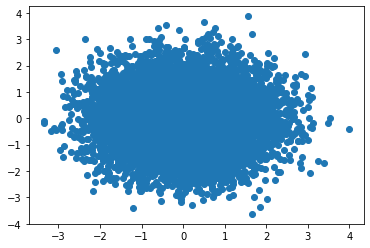

In [35]:
zs = jax.vmap(partial(features, mu=jnp.zeros(2), cov=jnp.eye(2)))(jax.random.split(jax.random.PRNGKey(0), 10000))
plt.scatter(zs[:,0], zs[:,1]);